In [6]:
%run data_wrangling.ipynb

The agreement was signed with Biohit Healthcare Ltd , the UK-based subsidiary of Biohit Oyj , a Finnish public company which develops , manufactures and markets liquid handling products and diagnostic test systems .


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Altia a False
's ' False
operating o False
profit p False
jumped j False
to t False
EUR e False
47 4 True
million m False
from f False
EUR e False
6.6 6 True
million m False
. . False
(47478,)
(89642,)
Final corpus contains 45051 words, with 7265 unique values in the dictionary


In [7]:
len(train_df)

3877

In [8]:
y_train=train_df['label']
y_train.value_counts(normalize=True)

1    0.598401
2    0.277792
0    0.123807
Name: label, dtype: float64

In [9]:
y_train.value_counts()

1    2320
2    1077
0     480
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x21dc55fd5e0>,
 [Text(-0.33465857346580197, 1.047856688295606, 'Neutral - 2320'),
  Text(-0.08770447652864402, -1.096498027721362, 'Good - 1077'),
  Text(1.0178379330080645, -0.4171401948144908, 'Bad - 480')],
 [Text(-0.1825410400722556, 0.571558193615785, '59.8%'),
  Text(-0.04783880537926037, -0.598089833302561, '27.8%'),
  Text(0.5551843270953077, -0.22753101535335857, '12.4%')])

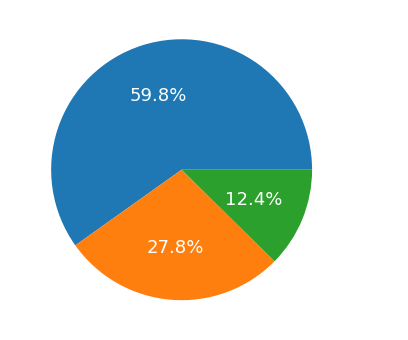

In [13]:
def custom_autopct(x):
    return '{:.1f}% ({:.0f})'.format(x, x/100*y_train.sum())
f, ax = plt.subplots(figsize=(10,6))
ax.pie(y_train.value_counts(),autopct='%1.1f%%',labels=['Neutral - 2320','Good - 1077','Bad - 480'],textprops={'fontsize':18,'color':'white'})

In [14]:
y_train.value_counts(normalize=True)

1    0.598401
2    0.277792
0    0.123807
Name: label, dtype: float64

In [6]:
bad=train_df[(train_df['label']==0)]
neutral=train_df[(train_df['label']==1)]
good=train_df[(train_df['label']==2)]

In [7]:
pre_proc=TextPreprocessor()
bad_preprocessed=pre_proc.fit_transform(bad['sentence'])
neutral_preprocessed=pre_proc.fit_transform(neutral['sentence'])
good_preprocessed=pre_proc.fit_transform(good['sentence'])

In [9]:
bad_split=[sent.split() for sent in bad_preprocessed]
neutral_split=[sent.split() for sent in neutral_preprocessed]
good_split=[sent.split() for sent in good_preprocessed]

In [35]:
bad_corpus=' '.join(itertools.chain(*bad_split))
neutral_corpus=' '.join(itertools.chain(*neutral_split))
good_corpus=' '.join(itertools.chain(*good_split))

In [24]:
import wordcloud

In [26]:
wordcloud.WordCloud()

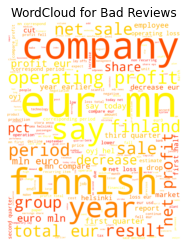

In [62]:
bad_cloud=wordcloud.WordCloud(width=800,height=1000,colormap='autumn',background_color='white').generate(bad_corpus)

plt.imshow(bad_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Bad Reviews')
plt.show()

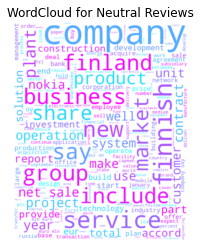

In [64]:
neutral_cloud=wordcloud.WordCloud(width=800,height=1000,colormap='cool',background_color='white').generate(neutral_corpus)

plt.imshow(neutral_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Reviews')
plt.show()

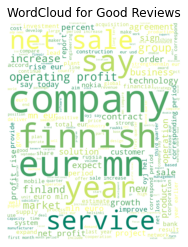

In [65]:
good_cloud=wordcloud.WordCloud(width=800,height=1000,colormap='summer',background_color='white').generate(good_corpus)

plt.imshow(good_cloud,interpolation='bilinear')
plt.title('WordCloud for Good Reviews')
plt.axis('off')
plt.show()

Some key words appear often across two or more classes due to the nature of the dataset (audit documentation of finnish companies). For example, 'net sale' appears across all classes, but they mean different things with different sequences or contexts), like 'net sale decreases' or 'net sale increases'. This is an indication that with word frequency distribution alone, it may not have as much class differenciating power without the contexts.